# Common Libraries

In [249]:
import os
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt

# Constants

In [251]:
n_obj = 10

# Paths

In [252]:
fps_file_name_format = "fps_n{n_obj}.csv"
rendering_file_name_format = "rendering_performance_n{n_obj}.csv"

data_dir_path = "/Users/seojin/Desktop/RenderingPerformance"
fps_file_path = os.path.join(data_dir_path, fps_file_name_format.format(n_obj = n_obj))
rendering_file_path = os.path.join(data_dir_path, rendering_file_name_format.format(n_obj = n_obj))

# Load data

In [253]:
fps = pd.read_csv(fps_file_path)
fps["Time"] = [datetime.fromisoformat(time.replace('Z', '+00:00')) for time in fps["Time"]]

rendering = pd.read_csv(rendering_file_path)
rendering["Time"] = [datetime.fromisoformat(time.replace('Z', '+00:00')) for time in rendering["Time"]]

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0., 73.]),
 array([36. , 41.4, 46.8, 52.2, 57.6, 63. , 68.4, 73.8, 79.2, 84.6, 90. ]),
 <BarContainer object of 10 artists>)

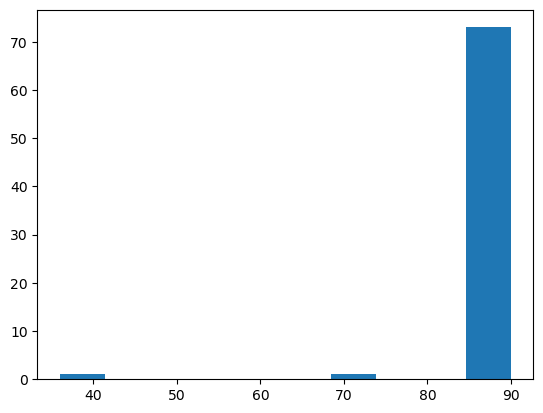

In [254]:
plt.hist(fps["FPS"][2:])

In [255]:
rendering[rendering["EventType"] == "End entity loading"]["Description"].iloc[0]

'fileSize: 25MB - #obj: 10'

In [256]:
rendering[rendering["EventType"] == "End calc vertex"]["Description"].iloc[0]

nan

# Loading

In [257]:
load_start_t = rendering[rendering["EventType"] == "Start entity loading"].iloc[0]["Time"]
load_end_t = rendering[rendering["EventType"] == "End entity loading"].iloc[0]["Time"]

mean_load_fps = fps[(fps["Time"] > load_start_t) & (fps["Time"] < load_end_t)]["FPS"].mean()
load_time = (load_end_t - load_start_t).total_seconds()
print(f"Loading time: {load_time}, fps: {mean_load_fps}")

Loading time: 2.386, fps: 83.66666666666667


# Rendering

In [258]:
render_start_t = rendering[rendering["EventType"] == "Start entity rendering"].iloc[0]["Time"]
render_end_t = rendering[rendering["EventType"] == "End entity rendering"].iloc[0]["Time"]

mean_render_fps = fps[(fps["Time"] > render_start_t) & (fps["Time"] < render_end_t)]["FPS"].mean()
rendering_time = (render_end_t - render_start_t).total_seconds()
print(f"Rendering time: {rendering_time}, fps: {mean_render_fps}")

Rendering time: 0.0, fps: nan


# Rolling

In [259]:
left0_t = rendering[rendering["EventType"] == "Left(90)"].iloc[0]["Time"]
right0_t = rendering[rendering["EventType"] == "Right(90)"].iloc[0]["Time"]

mean_rolling_fps = fps[(fps["Time"] > left0_t) & (fps["Time"] < right0_t)]["FPS"].mean()
rolling_time = (right0_t - left0_t).total_seconds()
print(f"Rolling time: {rolling_time}, fps: {mean_rolling_fps}")

Rolling time: 5.998, fps: 89.66666666666667


In [260]:
rendering

,Time,EventType,Description
0,2025-05-14 10:40:06.639000+00:00,Start entity loading,NaN
1,2025-05-14 10:40:09.025000+00:00,End entity loading,fileSize: 25MB - #obj: 10
2,2025-05-14 10:40:09.025000+00:00,Start calc vertex,NaN
3,2025-05-14 10:40:09.210000+00:00,End calc vertex,NaN
4,2025-05-14 10:40:09.289000+00:00,Start entity rendering,NaN
5,2025-05-14 10:40:09.289000+00:00,End entity rendering,NaN
6,2025-05-14 10:40:16.286000+00:00,Left(90),NaN
7,2025-05-14 10:40:17.284000+00:00,Left(90),NaN
8,2025-05-14 10:40:22.284000+00:00,Right(90),NaN
9,2025-05-14 10:40:23.284000+00:00,Right(90),NaN
